In [402]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
from copy import deepcopy

In [403]:
correct_order = ["name", "year", "selling_price", "km_driven", "fuel", "transmission","owner", "mileage", "engine", "max_power", "seats"]

## BỘ SỐ 1

In [404]:
raw_df = pd.read_csv('raw_csv/cardekho.csv')
raw_df = raw_df[(raw_df['fuel']!='CNG') & (raw_df['fuel']!='LPG') & (raw_df['owner']!='Test Drive Car')]
raw_df['owner'] = raw_df['owner'].str.replace(' Owner','',regex=True)
raw_df['name'] = raw_df['name'].str.split().str[0]# .str.title()
raw_df['selling_price'] = raw_df['selling_price'] / 100000.0
print(raw_df['owner'].unique())
raw_df.head()

['First' 'Second' 'Third' 'Fourth & Above']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti,2014,4.50,145500,Diesel,Individual,Manual,First,23.40,1248.0,74,5.0
1,Skoda,2014,3.70,120000,Diesel,Individual,Manual,Second,21.14,1498.0,103.52,5.0
2,Honda,2006,1.58,140000,Petrol,Individual,Manual,Third,17.70,1497.0,78,5.0
3,Hyundai,2010,2.25,127000,Diesel,Individual,Manual,First,23.00,1396.0,90,5.0
4,Maruti,2007,1.30,120000,Petrol,Individual,Manual,First,16.10,1298.0,88.2,5.0


In [405]:

# Dictionary ánh xạ từ tên cột cũ sang tên cột mới
column_mapping = {
    "mileage(km/ltr/kg)": "mileage"
}
raw_df00 = raw_df.drop(columns=['seller_type'])
raw_df00.rename(columns=column_mapping, inplace=True)
print(raw_df00.columns)
raw_df00.info()


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   transmission   8028 non-null   object 
 6   owner          8028 non-null   object 
 7   mileage        7814 non-null   float64
 8   engine         7814 non-null   float64
 9   max_power      7820 non-null   object 
 10  seats          7814 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 752.6+ KB


## BỘ SỐ 3

In [406]:
# Đọc dữ liệu từ file csv
raw_df1 = pd.read_csv('raw_csv/processes2.csv')
raw_df1 = raw_df1[(raw_df1['fuel']!='CNG') & (raw_df1['fuel']!='LPG') & (raw_df1['owner']!='Test Drive Car')]
raw_df1['owner'] = raw_df1['owner'].str.replace(' Owner','',regex=True)
raw_df1['selling_price'] = raw_df1['selling_price'] / 100000.0
print(raw_df1['fuel'].unique())
print(raw_df1['owner'].unique())
raw_df1.head()

['Diesel' 'Petrol']
['First' 'Second' 'Third' 'Fourth & Above']


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,4.50,145500,Diesel,Individual,Manual,First,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,2.25,127000,Diesel,Individual,Manual,First,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,4.40,45000,Petrol,Individual,Manual,First,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,3.50,90000,Diesel,Individual,Manual,First,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,2.00,169000,Diesel,Individual,Manual,First,5,68.10,kmpl,20.00,1399


In [407]:
# Tiền xử lý dữ liệu
column_mapping01 = {
        "max_power (in bph)": "max_power",
        "Mileage": "mileage",
        "Engine (CC)": "engine"
    }
raw_df01 = raw_df1.drop(columns=[ 'seller_type', 'Mileage Unit', 'Unnamed: 0'])
raw_df01.rename(columns=column_mapping01, inplace=True)
raw_df01 = raw_df01[correct_order]
raw_df01.info()
raw_df01.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2074 entries, 0 to 2094
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2074 non-null   object 
 1   year           2074 non-null   int64  
 2   selling_price  2074 non-null   float64
 3   km_driven      2074 non-null   int64  
 4   fuel           2074 non-null   object 
 5   transmission   2074 non-null   object 
 6   owner          2074 non-null   object 
 7   mileage        2074 non-null   float64
 8   engine         2074 non-null   int64  
 9   max_power      2074 non-null   float64
 10  seats          2074 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 194.4+ KB


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,4.50,145500,Diesel,Manual,First,23.40,1248,74.00,5
1,Hyundai,2010,2.25,127000,Diesel,Manual,First,23.00,1396,90.00,5
2,Hyundai,2017,4.40,45000,Petrol,Manual,First,20.14,1197,81.86,5
3,Toyota,2011,3.50,90000,Diesel,Manual,First,23.59,1364,67.10,5
4,Ford,2013,2.00,169000,Diesel,Manual,First,20.00,1399,68.10,5


## Bộ số 2 

In [408]:
raw_df2 = pd.read_csv('raw_csv/train.csv')
print(raw_df2['Owner_Type'].unique())
raw_df2 = raw_df2[raw_df2['Fuel_Type']!='Electric']
raw_df2['Engine'] = raw_df2['Engine'].str.extract('(\d+)')  # Lấy chỉ số trong chuỗi
raw_df2['Power'] = raw_df2['Power'].str.extract('(\d+)')  # Lấy chỉ số trong chuỗi
raw_df2['Mileage'] = raw_df2['Mileage'].str.extract('(\d+)')  # Lấy chỉ số trong chuỗi
raw_df2 = raw_df2[~raw_df2['Mileage'].str.contains('km/kg', na=False)]
raw_df2['Name'] = raw_df2['Name'].str.split(' ').str[0]
raw_df2.head()


['First' 'Second' 'Fourth & Above' 'Third']


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19,1582,126,5.0,NaN,12.50
1,2,Honda,Chennai,2011,46000,Petrol,Manual,First,13,1199,88,5.0,8.61 Lakh,4.50
2,3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20,1248,88,7.0,NaN,6.00
3,4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968,140,5.0,NaN,17.74
4,6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23,1461,63,5.0,NaN,3.50


In [409]:

column_mapping02 = {
        "Year": "year",
        "Kilometers_Driven": "km_driven",
        "Fuel_Type": "fuel",
        "Transmission": "transmission",
        "Mileage": "mileage",
        "Engine": "engine",
        "Power": "max_power",
        "Seats": "seats",
        "Price": "selling_price",
        "Name": "name",
        "Owner_Type": "owner"
    }
raw_df02 = raw_df2.drop(columns=['New_Price', 'Location','Unnamed: 0'])
raw_df02.rename(columns=column_mapping02, inplace=True)
raw_df02 = raw_df02[correct_order]
raw_df02.info()
raw_df02.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5845 entries, 0 to 5846
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5845 non-null   object 
 1   year           5845 non-null   int64  
 2   selling_price  5845 non-null   float64
 3   km_driven      5845 non-null   int64  
 4   fuel           5845 non-null   object 
 5   transmission   5845 non-null   object 
 6   owner          5845 non-null   object 
 7   mileage        5845 non-null   object 
 8   engine         5809 non-null   object 
 9   max_power      5809 non-null   object 
 10  seats          5807 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 548.0+ KB


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Hyundai,2015,12.50,41000,Diesel,Manual,First,19,1582,126,5.0
1,Honda,2011,4.50,46000,Petrol,Manual,First,13,1199,88,5.0
2,Maruti,2012,6.00,87000,Diesel,Manual,First,20,1248,88,7.0
3,Audi,2013,17.74,40670,Diesel,Automatic,Second,15,1968,140,5.0
4,Nissan,2013,3.50,86999,Diesel,Manual,First,23,1461,63,5.0


In [410]:
# Gộp 3 dataset lại thành một
merged_df = pd.concat([raw_df00, raw_df01, raw_df02], ignore_index=True)

# Xuất ra file CSV
saved_file_path = 'merged_dataset.csv'
merged_df.to_csv(saved_file_path, index=False)

print(f"✅ Đã gộp xong và lưu vào '{saved_file_path}'")

✅ Đã gộp xong và lưu vào 'merged_dataset.csv'


## Load merged data

In [411]:
raw_df = pd.read_csv(saved_file_path)
raw_df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,4.50,145500,Diesel,Manual,First,23.40,1248.0,74.00,5.0
1,Skoda,2014,3.70,120000,Diesel,Manual,Second,21.14,1498.0,103.52,5.0
2,Honda,2006,1.58,140000,Petrol,Manual,Third,17.70,1497.0,78.00,5.0
3,Hyundai,2010,2.25,127000,Diesel,Manual,First,23.00,1396.0,90.00,5.0
4,Maruti,2007,1.30,120000,Petrol,Manual,First,16.10,1298.0,88.20,5.0


In [412]:
# Show the shape of the dataset
raw_df.shape

(15947, 11)

In [413]:
# Show some statistical information about dataset
raw_df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,15947.000000,15947.000000,1.594700e+04,15733.000000,15697.000000,15703.000000,15695.000000
mean,2013.708848,7.317741,6.530429e+04,19.038960,1491.325285,97.953659,5.328703
std,3.654452,9.130975,7.067008e+04,4.080677,536.029927,43.934431,0.861552
min,1983.000000,0.299990,1.710000e+02,0.000000,624.000000,0.000000,2.000000
25%,2012.000000,2.915000,3.468700e+04,16.300000,1197.000000,70.000000,5.000000
50%,2014.000000,4.800000,5.900000e+04,19.330000,1364.000000,85.800000,5.000000
75%,2016.000000,7.450000,8.583650e+04,22.000000,1598.000000,110.000000,5.000000
max,2020.000000,160.000000,6.500000e+06,42.000000,5998.000000,560.000000,14.000000


In [414]:
columns_names = raw_df.columns
columns_names

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [415]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15947 entries, 0 to 15946
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           15947 non-null  object 
 1   year           15947 non-null  int64  
 2   selling_price  15947 non-null  float64
 3   km_driven      15947 non-null  int64  
 4   fuel           15947 non-null  object 
 5   transmission   15947 non-null  object 
 6   owner          15947 non-null  object 
 7   mileage        15733 non-null  float64
 8   engine         15697 non-null  float64
 9   max_power      15703 non-null  float64
 10  seats          15695 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.3+ MB


## Explore data analysis

In [416]:
# Take copy from data to make processes on
preprocessed_df = deepcopy(raw_df)

# Show all types of columns in the data
preprocessed_df.dtypes

name              object
year               int64
selling_price    float64
km_driven          int64
fuel              object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [417]:
# Check about none values in data to decide if we will make data cleaning or not
preprocessed_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          214
engine           250
max_power        244
seats            252
dtype: int64

## Handling missing values

In [418]:
# Handle missing values of float columns that are mileage(km/ltr/kg), engine, seats
column_float_imputed = ['mileage', 'engine', 'max_power']
preprocessed_df[column_float_imputed] = preprocessed_df[column_float_imputed].fillna(preprocessed_df[column_float_imputed].mean())

# Xử lý null cho cột seats bằng mode
preprocessed_df['seats'] = preprocessed_df['seats'].fillna(preprocessed_df['seats'].mode()[0])

# Kiểm tra giá trị null còn lại
print(preprocessed_df.isnull().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


## Handling textual columns

In [419]:
# Get textual columns by select dtypes function
textual_columns = preprocessed_df.select_dtypes(include = ['object']).columns
textual_columns

Index(['name', 'fuel', 'transmission', 'owner'], dtype='object')

In [420]:
preprocessed_df[textual_columns]

,name,fuel,transmission,owner
0,Maruti,Diesel,Manual,First
1,Skoda,Diesel,Manual,Second
2,Honda,Petrol,Manual,Third
3,Hyundai,Diesel,Manual,First
4,Maruti,Petrol,Manual,First
...,...,...,...,...
15942,Maruti,Diesel,Manual,First
15943,Hyundai,Diesel,Manual,First
15944,Mahindra,Diesel,Manual,Second
15945,Maruti,Petrol,Manual,First


In [421]:
textual_colmns = preprocessed_df.select_dtypes(include=['object'])
textual_columns_names = textual_colmns.columns
textual_colmns

,name,fuel,transmission,owner
0,Maruti,Diesel,Manual,First
1,Skoda,Diesel,Manual,Second
2,Honda,Petrol,Manual,Third
3,Hyundai,Diesel,Manual,First
4,Maruti,Petrol,Manual,First
...,...,...,...,...
15942,Maruti,Diesel,Manual,First
15943,Hyundai,Diesel,Manual,First
15944,Mahindra,Diesel,Manual,Second
15945,Maruti,Petrol,Manual,First


## Label encoding textual columns

In [422]:
# Dictionary to store the encoders
label_encoders = {}

# Fit and transform each textual column, saving the encoders
for col in textual_columns:
    label_encoder = LabelEncoder()
    preprocessed_df[col] = label_encoder.fit_transform(preprocessed_df[col])
    label_encoders[col] = label_encoder

preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,23,2014,4.50,145500,0,1,0,23.40,1248.0,74.00,5.0
1,32,2014,3.70,120000,0,1,2,21.14,1498.0,103.52,5.0
2,11,2006,1.58,140000,1,1,3,17.70,1497.0,78.00,5.0
3,12,2010,2.25,127000,0,1,0,23.00,1396.0,90.00,5.0
4,23,2007,1.30,120000,1,1,0,16.10,1298.0,88.20,5.0


In [423]:
# Check about if there is any extra textual columns
preprocessed_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

## Handling zero-prices


## Correlation matrix

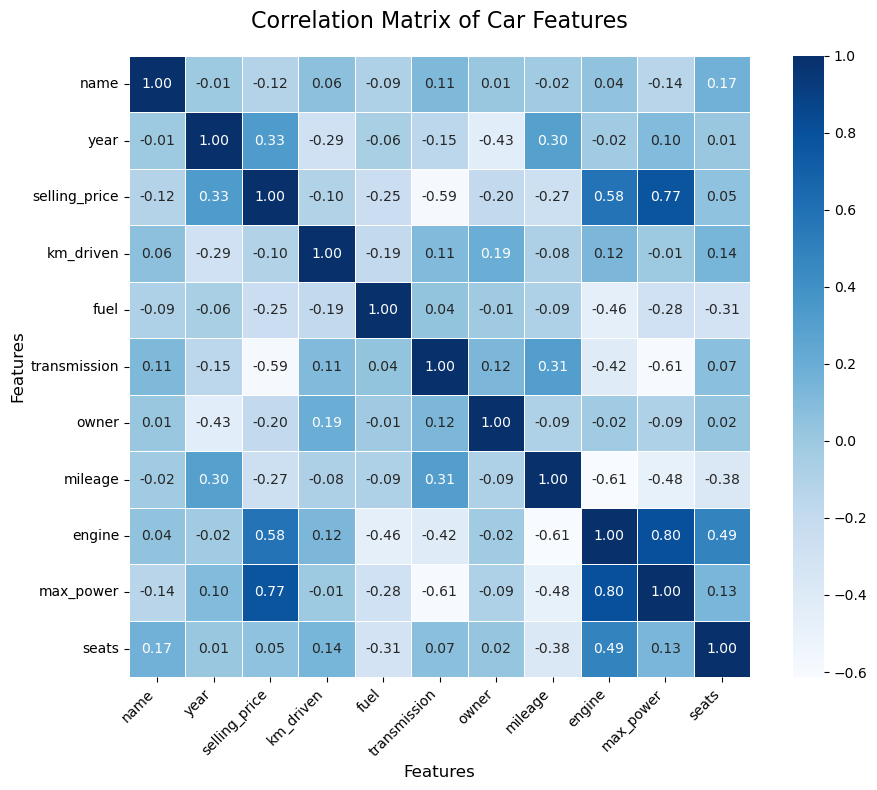

In [424]:
correlation = preprocessed_df.corr()
# sns.heatmap(correlation, cbar=True,square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap = 'Blues')
# plt.show()

# Giả sử 'correlation' là ma trận tương quan đã được tính từ preprocessed_df
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation, 
    cbar=True, 
    square=True, 
    fmt='.2f', 
    annot=True, 
    annot_kws={'size': 10},  # Tăng cỡ chữ của số trong ô
    cmap='Blues', 
    linewidths=0.5,  # Thêm đường viền giữa các ô
    linecolor='white'  # Màu viền trắng
)

# Thêm tiêu đề
plt.title('Correlation Matrix of Car Features', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Tùy chỉnh kích thước chữ của nhãn trục
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

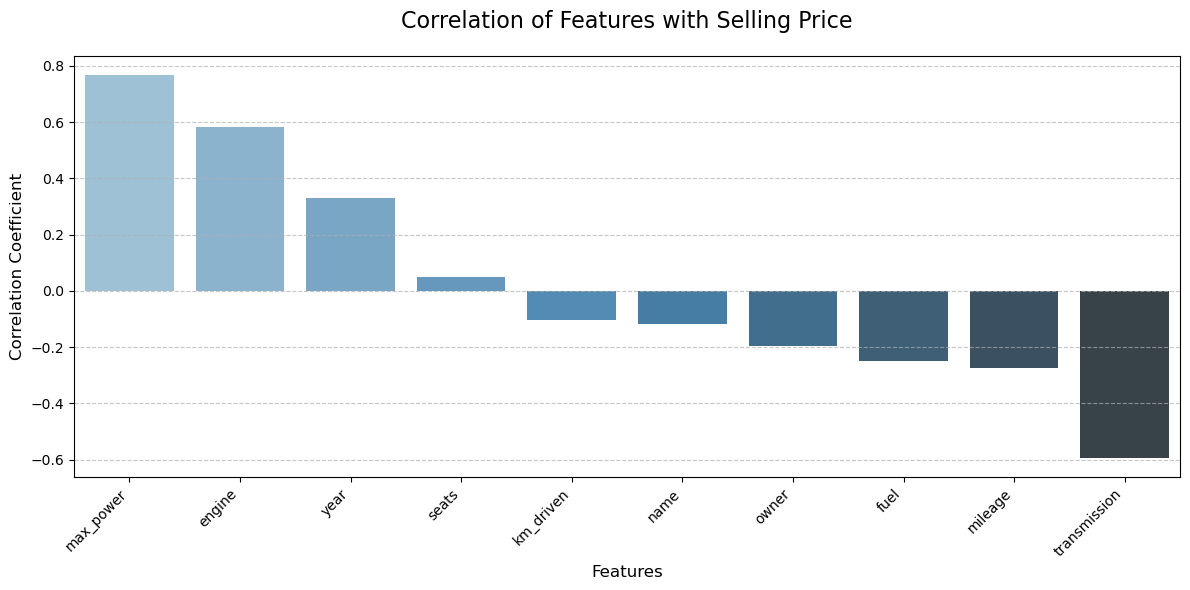

In [425]:
# plot correlation degree between selling price column and other columns
# correlation['selling_price'].drop('selling_price').sort_values(ascending = False).plot(kind = 'bar')

# Tính tương quan với 'selling_price' và loại bỏ chính nó
corr_with_price = correlation['selling_price'].drop('selling_price').sort_values(ascending=False)

# Vẽ bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values, hue=corr_with_price.index, palette='Blues_d')

# Thêm tiêu đề
plt.title('Correlation of Features with Selling Price', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)

# Tùy chỉnh nhãn trục X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Thêm lưới nhẹ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

## Handling outliers

name            -0.015550
year            -0.950981
km_driven       50.551949
fuel             0.166768
transmission    -1.674586
owner            1.140772
mileage         -0.455733
engine           1.452807
max_power        2.188713
seats            2.178515
dtype: float64


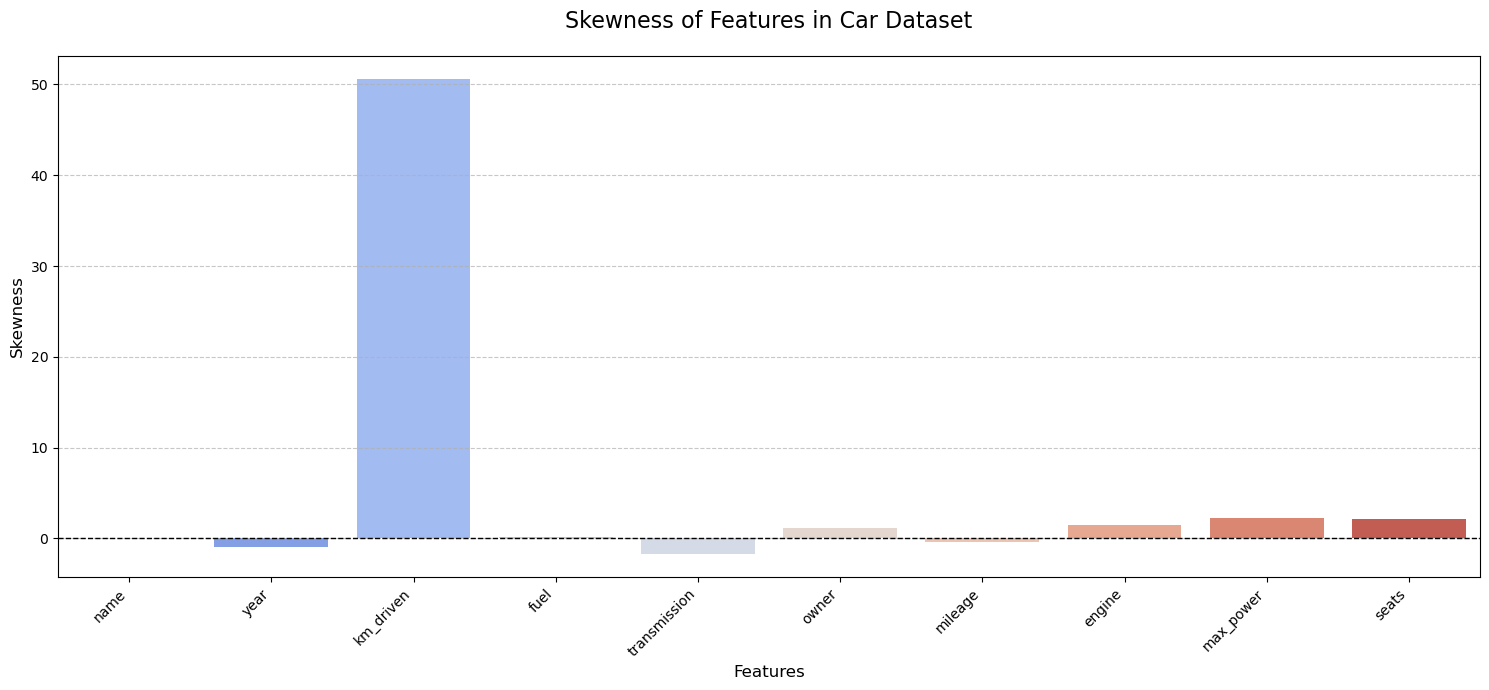

In [426]:
# Check Skewness for each column
# column_skewed = preprocessed_df.columns.drop('selling_price')
# skewness = preprocessed_df.drop(columns = ['selling_price']).skew()
# print(skewness)

# plt.figure(figsize = (15,7))
# plt.bar(column_skewed, skewness)
# plt.show()

# Tính skewness, loại bỏ 'selling_price'
column_skewed = preprocessed_df.columns.drop('selling_price')
skewness = preprocessed_df.drop(columns=['selling_price']).skew()
print(skewness)

# Vẽ bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=column_skewed, y=skewness, hue=column_skewed, palette='coolwarm')

# Thêm tiêu đề
plt.title('Skewness of Features in Car Dataset', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)

# Thêm đường tham chiếu tại y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Tùy chỉnh nhãn trục X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Thêm lưới nhẹ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

In [427]:
# Handle skewness of km driven columns by taking the log function for it
preprocessed_df['km_driven'] = np.log(preprocessed_df['km_driven'])

In [428]:
# Find skewness for km driven column after we handled it
preprocessed_df['km_driven'].skew()

np.float64(-1.1199384045302294)

name           -0.015550
year           -0.950981
km_driven      -1.119938
fuel            0.166768
transmission   -1.674586
owner           1.140772
mileage        -0.455733
engine          1.452807
max_power       2.188713
seats           2.178515
dtype: float64


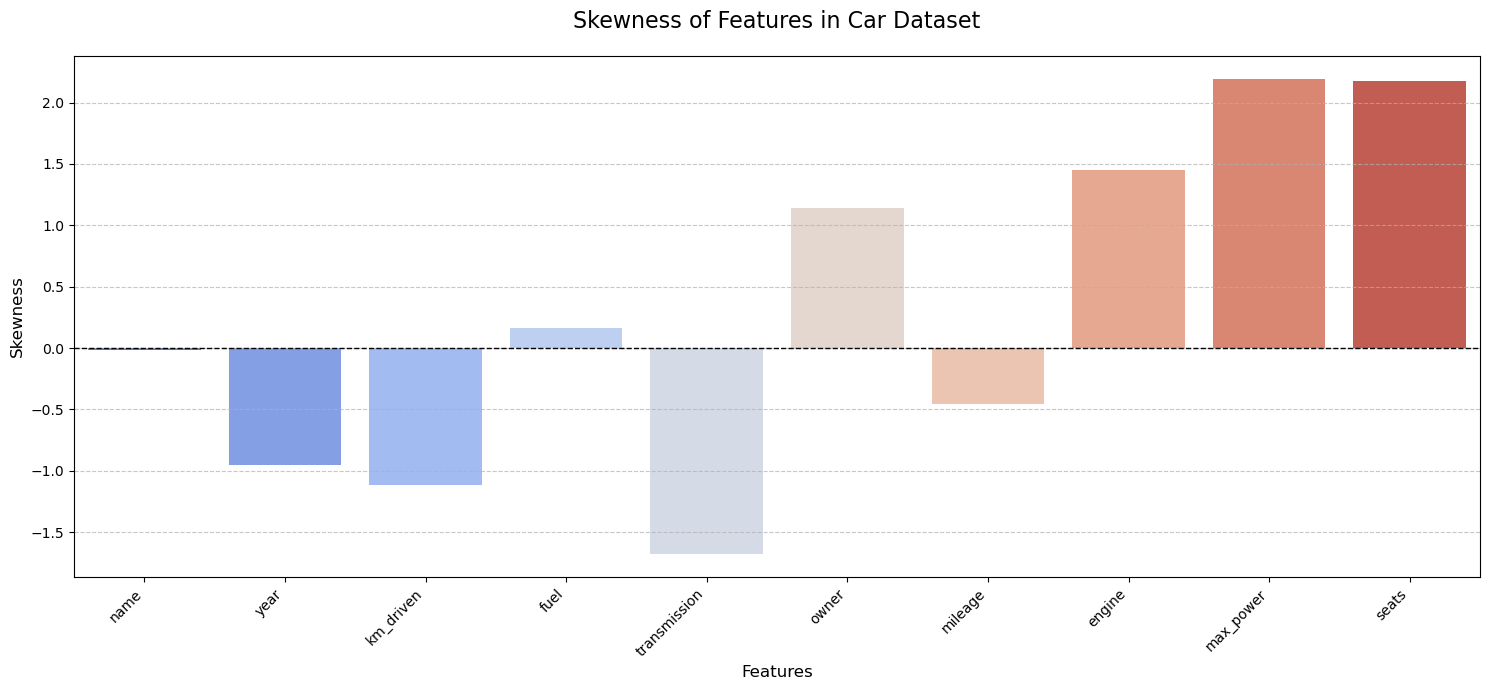

In [429]:
# Check Skewness for each column after the handling process
# column_skewed = preprocessed_df.columns.drop('selling_price')
# skewness = preprocessed_df.drop(columns = ['selling_price']).skew()

# plt.figure(figsize = (15,7))
# plt.bar(column_skewed, skewness)


# Tính skewness, loại bỏ 'selling_price'
column_skewed = preprocessed_df.columns.drop('selling_price')
skewness = preprocessed_df.drop(columns=['selling_price']).skew()
print(skewness)

# Vẽ bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=column_skewed, y=skewness, hue=column_skewed, palette='coolwarm')

# Thêm tiêu đề
plt.title('Skewness of Features in Car Dataset', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)

# Thêm đường tham chiếu tại y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Tùy chỉnh nhãn trục X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Thêm lưới nhẹ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

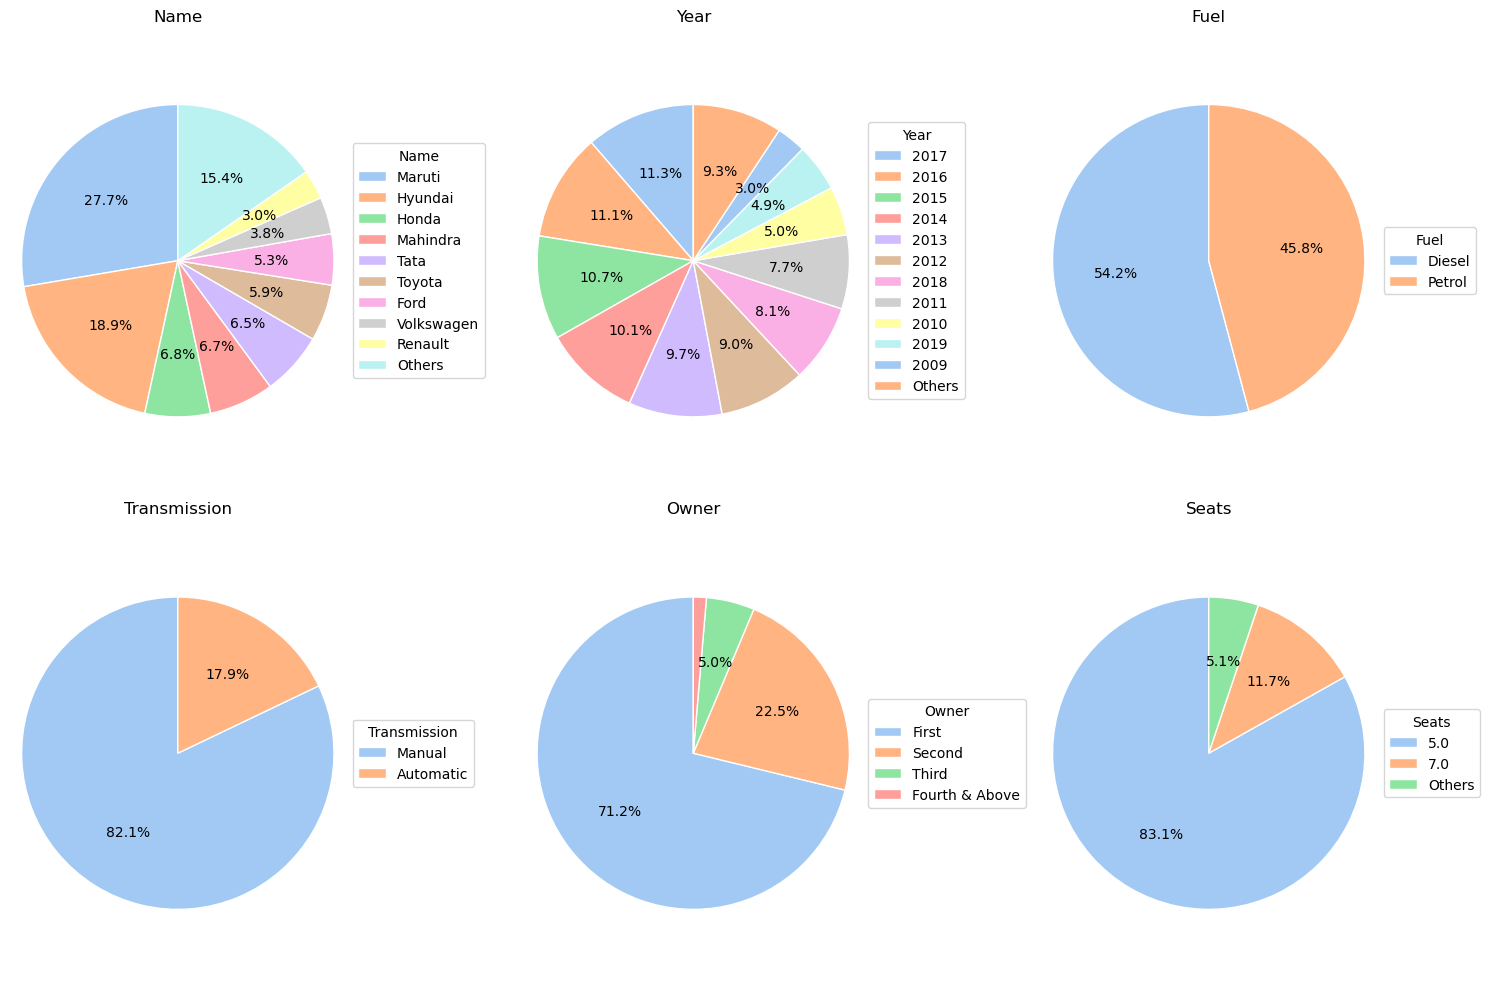

In [430]:
# categorical_columns = ['year', 'fuel','seller_type', 'transmission','owner','seats']
# plt.figure(figsize = (8, 6))
# for index, col in enumerate(categorical_columns):
#     values_count = preprocessed_df[col].value_counts()
#     plt.subplot(2, 3, index + 1)
#     plt.axis('off')
#     plt.title(col)
#     plt.pie(values_count, labels=values_count.index)
# plt.show()

# Giả sử preprocessed_df và label_encoders đã được định nghĩa
categorical_columns = ['name', 'year', 'fuel', 'transmission', 'owner', 'seats']
# correct_order = ["name", "year", "selling_price", "km_driven", "fuel", "transmission","owner", "mileage", "engine", "max_power", "seats"]

# Thiết lập kích thước figure
plt.figure(figsize=(15, 10))

# Ngưỡng phần trăm để gộp (có thể thay đổi, ví dụ: 5%)
threshold = 3.0

# Duyệt qua từng cột để vẽ pie chart
for index, col in enumerate(categorical_columns):
    # Đếm số lượng giá trị
    values_count = preprocessed_df[col].value_counts()
    total = values_count.sum()
    
    # Nếu là 'year' hoặc 'seats', gộp các giá trị nhỏ
    if col in ['name', 'year', 'seats']:
        # Tính phần trăm cho từng giá trị
        percentages = (values_count / total * 100)
        # Lọc các giá trị lớn hơn ngưỡng
        major_values = percentages[percentages >= threshold]
        # Gộp các giá trị nhỏ thành 'Others'
        others_sum = percentages[percentages < threshold].sum()
        if others_sum > 0:
            filtered_values = pd.concat([major_values, pd.Series([others_sum], index=['Others'])])
        else:
            filtered_values = major_values
        values_count = (filtered_values / 100 * total).astype(int)  # Chuyển lại thành số đếm
    else:
        filtered_values = values_count / total * 100  # Giữ nguyên phần trăm
    
    # Xử lý nhãn
    if col in label_encoders:
        # labels = [label_encoders[col].inverse_transform([i])[0] for i in values_count.index]
        labels = []
        for i in values_count.index:
            if i == 'Others':  # Nếu là "Others", giữ nguyên
                labels.append(i)
            else:
                labels.append(label_encoders[col].inverse_transform([i])[0])
    else:
        labels = values_count.index.astype(str)  # Chuyển 'year', 'seats' thành chuỗi
    
    if col in ['year', 'seats'] and 'Others' in filtered_values.index:
        labels = list(major_values.index.astype(str)) + ['Others']
    
    # Tạo subplot
    plt.subplot(2, 3, index + 1)
    
    # Vẽ pie chart
    colors = sns.color_palette('pastel', len(values_count))
    wedges, texts, autotexts = plt.pie(
        values_count,
        labels=None,
        autopct=lambda p: f'{p:.1f}%' if p >= threshold else '',  # Chỉ hiển thị % nếu >= ngưỡng
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 10}
    )
    
    # Tùy chỉnh phần trăm
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    
    # Tiêu đề
    plt.title(col.capitalize(), fontsize=12, pad=10)
    
    # Thêm legend
    plt.legend(
        wedges,
        labels,
        title=col.capitalize(),
        loc='center left',
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10
    )
    
    # Đảm bảo pie chart tròn
    plt.axis('equal')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()


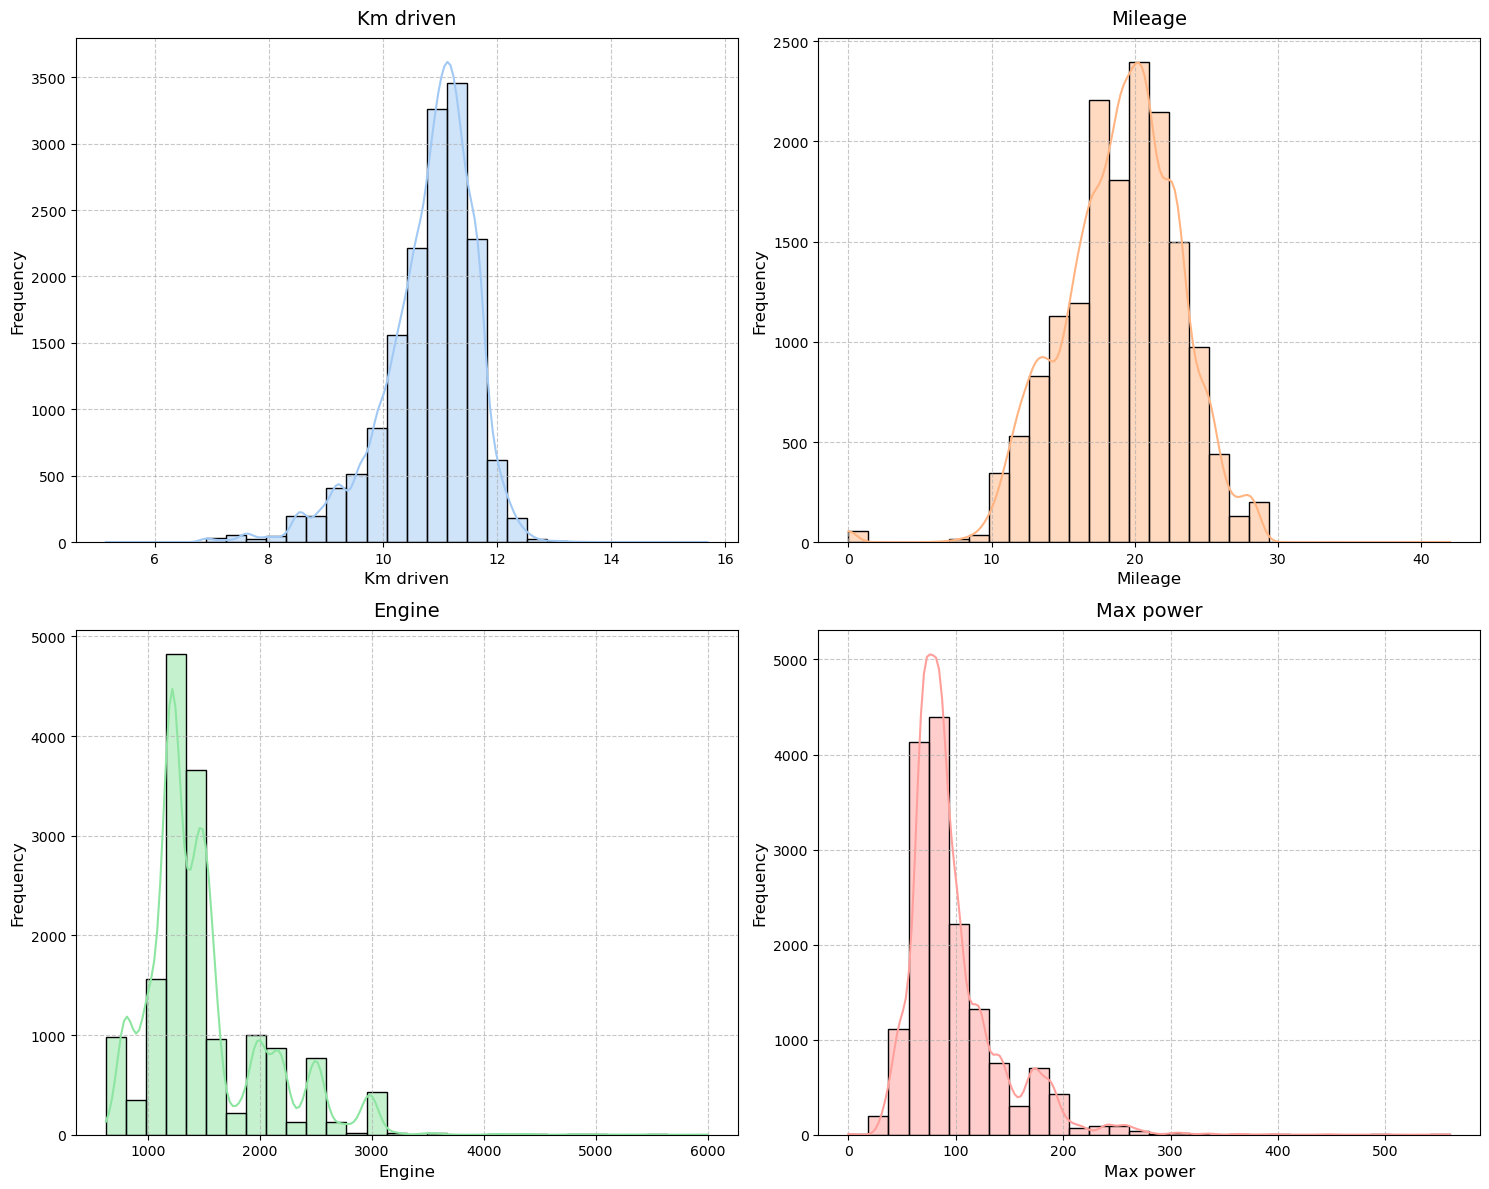

In [431]:
# continuous_columns = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power']
# plt.figure(figsize = (15,12))
# for index, col in enumerate(continuous_columns):
#     plt.subplot(2, 2, index + 1)
#     plt.axis('off')
#     plt.title(col)
#     plt.hist(preprocessed_df[col])
# plt.show()


# Danh sách các cột liên tục
continuous_columns = ['km_driven', 'mileage', 'engine', 'max_power']

# Thiết lập kích thước figure
plt.figure(figsize=(15, 12))

# Duyệt qua từng cột để vẽ histogram
for index, col in enumerate(continuous_columns):
    # Tạo subplot (2 hàng, 2 cột)
    plt.subplot(2, 2, index + 1)
    
    # Vẽ histogram với seaborn để đẹp hơn
    sns.histplot(data=preprocessed_df[col], bins=30, color=sns.color_palette('pastel')[index], kde=True)
    
    # Thêm tiêu đề
    plt.title(col.replace('_', ' ').capitalize(), fontsize=14, pad=10)
    
    # Thêm nhãn trục
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Thêm lưới nhẹ để dễ đọc
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Tùy chỉnh các trục
    plt.tick_params(axis='both', labelsize=10)

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.show()

In [432]:
preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,23,2014,4.50,11.887931,0,1,0,23.40,1248.0,74.00,5.0
1,32,2014,3.70,11.695247,0,1,2,21.14,1498.0,103.52,5.0
2,11,2006,1.58,11.849398,1,1,3,17.70,1497.0,78.00,5.0
3,12,2010,2.25,11.751942,0,1,0,23.00,1396.0,90.00,5.0
4,23,2007,1.30,11.695247,1,1,0,16.10,1298.0,88.20,5.0


In [433]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15947 entries, 0 to 15946
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           15947 non-null  int64  
 1   year           15947 non-null  int64  
 2   selling_price  15947 non-null  float64
 3   km_driven      15947 non-null  float64
 4   fuel           15947 non-null  int64  
 5   transmission   15947 non-null  int64  
 6   owner          15947 non-null  int64  
 7   mileage        15947 non-null  float64
 8   engine         15947 non-null  float64
 9   max_power      15947 non-null  float64
 10  seats          15947 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


## Save the preprocessed data and label encoder

In [434]:
import joblib
saved_processed_data_path = 'preprocessed_dataset.csv'
preprocessed_df.to_csv(saved_processed_data_path, index=False)
joblib.dump(label_encoders, 'label_encoders.sav')

['label_encoders.sav']

## Modeling

In [435]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [436]:
# 1. Đọc dữ liệu
preprocessed_dff = pd.read_csv(saved_processed_data_path)


In [437]:
# Split data into input and label data
X = preprocessed_df.drop(columns = ['selling_price'])
Y = preprocessed_df['selling_price']
print(f'size of input data {X.shape}')
print(f'size of input data {Y.shape}')

size of input data (15947, 10)
size of input data (15947,)


In [438]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.12, random_state = 42)
print(f'x train size {x_train.shape}, x test size {x_test.shape}')
print(f'y train size {y_train.shape}, y test size {y_test.shape}')

x train size (14033, 10), x test size (1914, 10)
y train size (14033,), y test size (1914,)


In [439]:
# Chuẩn hóa dữ liệu (fit trên train, transform trên test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [440]:
# models = {
#     'Linear Regression': LinearRegression(), 
#     'Ridge': Ridge(), 
#     'Lasso': Lasso(), 
#     'ElasticNet': ElasticNet(), 
#     'Decision Tree': DecisionTreeRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor(),
#     'KNN': KNeighborsRegressor(),
#     'Random Forest': RandomForestRegressor()
# }

models = {
    'Linear Regression': LinearRegression(), 
    'Ridge': Ridge(), 
    'Lasso': Lasso(), 
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = []
best_model = None
best_model_name = None
best_mse = float('inf')  # Giá trị MSE lớn để bắt đầu so sánh

for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(x_train_scaled, y_train)
    
    # Dự đoán trên tập train và test
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)
    
    # Tính MSE
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    # Lưu kết quả
    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })
    
    # Cập nhật mô hình tốt nhất (nếu test_mse thấp hơn)
    if test_mse < best_mse:
        best_mse = test_mse
        best_model = model
        best_model_name = name

df_results = pd.DataFrame(results)
df_results


,Model,Train MSE,Test MSE
0,Linear Regression,26.343331,24.406413
1,Ridge,26.343332,24.406079
2,Lasso,29.290308,26.303546
3,Decision Tree,0.025728,6.028720
4,KNN,5.310620,8.052514
5,Random Forest,0.941402,4.578280


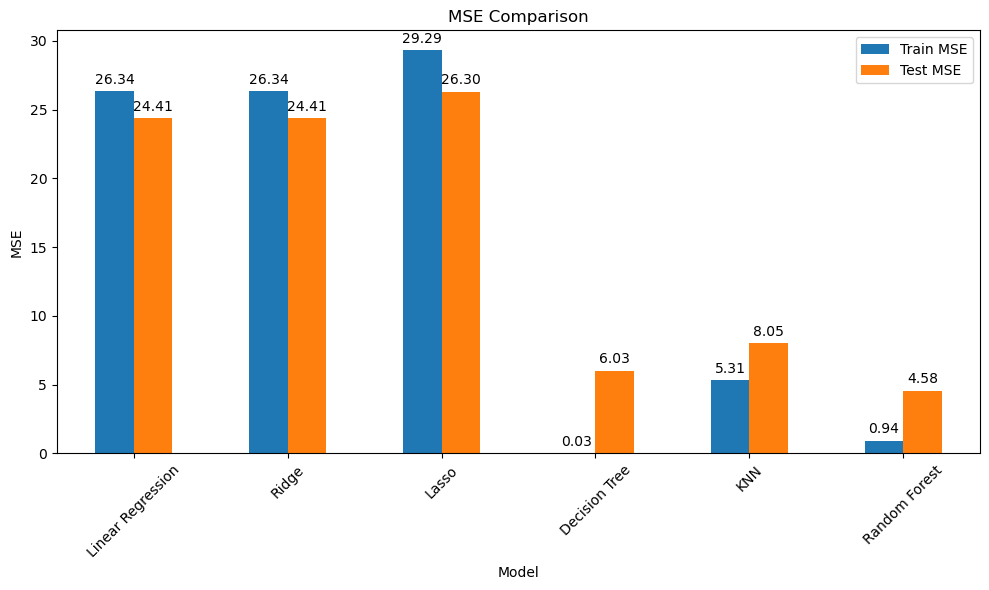

Mô hình tốt nhất (theo Test MSE): Random Forest với Test MSE = 4.58


In [441]:
# Vẽ biểu đồ cột so sánh Train MSE và Test MSE
df_results_plot = df_results.set_index('Model')[['Train MSE', 'Test MSE']]
ax = df_results_plot.plot(kind='bar', figsize=(10, 6), rot=45, title="MSE Comparison")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.ylabel("MSE")
plt.tight_layout()
plt.show()

# Xem mô hình tốt nhất
print(f"Mô hình tốt nhất (theo Test MSE): {best_model_name} với Test MSE = {best_mse:.2f}")



In [442]:
# Lưu bằng joblib
joblib.dump(best_model, "best_model.pkl")
print(f"Đã lưu {best_model_name} thành file best_model.pkl")


Đã lưu Random Forest thành file best_model.pkl


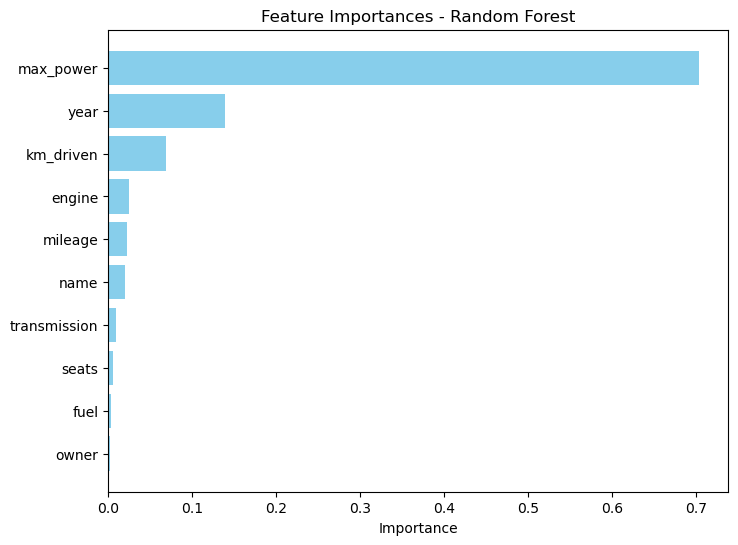

In [443]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    
    # Sắp xếp giảm dần theo độ quan trọng
    sorted_idx = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_idx]
    sorted_features = feature_names[sorted_idx]
    
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_features, sorted_importances, color='skyblue')
    plt.gca().invert_yaxis()  # Để feature cao nhất ở trên cùng
    plt.title(f"Feature Importances - {best_model_name}")
    plt.xlabel("Importance")
    plt.show()
else:
    print(f"Mô hình {best_model_name} không có thuộc tính 'feature_importances_'")


## Load the best model

In [444]:
# Load model
loaded_model = joblib.load("best_model.pkl")

# Dự đoán
predictions = loaded_model.predict(x_test_scaled)

zero_count = np.sum(x_test_scaled == 0)
zero_count_2 = np.sum(predictions == 0)
zero_count_3 = (y_test < 3).sum()


In [445]:
print(zero_count_3)

473


In [446]:
print(type(y_test))

<class 'pandas.core.series.Series'>


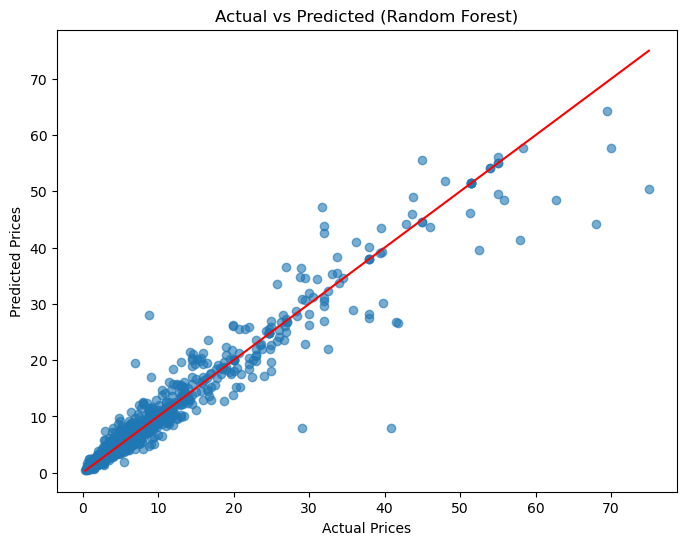

In [447]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Đường y = x
plt.show()


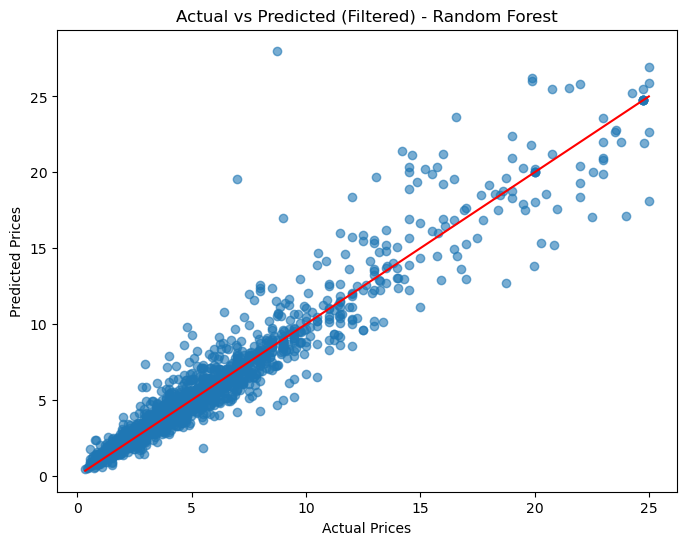

In [448]:
import numpy as np
import matplotlib.pyplot as plt

# Xác định ngưỡng lọc
y_threshold = max(y_test) / 3

# Lọc dữ liệu chỉ giữ những điểm có y_test <= y_threshold
mask = y_test <= y_threshold
filtered_y_test = y_test[mask]
filtered_predictions = predictions[mask]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(filtered_y_test, filtered_predictions, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted (Filtered) - {best_model_name}")
plt.plot([min(filtered_y_test), max(filtered_y_test)], 
         [min(filtered_y_test), max(filtered_y_test)], color='red')  # Đường y = x
plt.show()


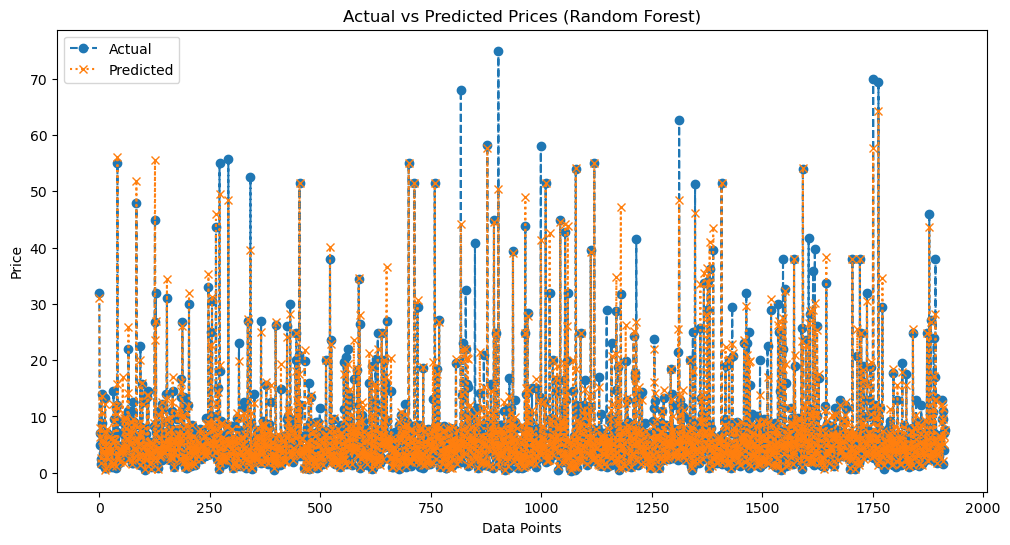

In [449]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
plt.plot(predictions, label="Predicted", marker='x', linestyle='dotted')
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.legend()
plt.show()
